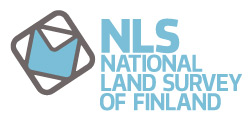


                    Ohjelma tulosten laskentaa varten / 
                    Software for calculating the results
                    
                    Author: Tuukka Mattila
                    Do not hesitate to contact via LinkedIn:
                    https://www.linkedin.com/in/tuukkamattila/
                    
                    Thank you for the help: Topi Rikkinen, Marko Ollikainen, Antti Laaksonen,
                    Hannu Koivula, Octavian Andrei, Mikael Kauhava, Timo Sallinen and Ari Huvinen

Laitetaan kello päälle ohjelman ajan mittaamiseksi. / Let's start the clock for the program to measure the time spent:

In [1]:
import time
time_beginning = time.time()

Tuodaan tarvittavat kirjastot / Import necessary Python libraries:

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import os
import sys
import math
import pathlib
import outlier_detection

AttributeError: module 'bottleneck' has no attribute '__version__'

Tuodaan data .txt- tai .csv-muodossa, eroteltuna ","-merkillä ja muotoiltuna (sarakkeiden järjestyksellä ei ole väliä) [Point Number,Code,Date,Time,Solution,Physical Station ID,Virtual Station ID,Northing,Easting,Ell Ht,Elev,Ant Ht,HRMS,VRMS,HDOP,VDOP,PDOP,GDOP,TDOP,GPS,GLONASS,GALILEO,BEIDOU,SBAS,QZSS]

/ 

Importing the data in .txt or .csv and separated with "," and formatted as (the order of the columns doesn't matter) [Point Number,Code,Date,Time,Solution,Physical Station ID,Virtual Station ID,Northing,Easting,Ell Ht,Elev,Ant Ht,HRMS,VRMS,HDOP,VDOP,PDOP,GDOP,TDOP,GPS,GLONASS,GALILEO,BEIDOU,SBAS,QZSS]:

In [ ]:
testmeasurements_df = pd.read_csv(testmeasurements_df_name, delimiter=',')
testmeasurements_df.name = testmeasurements_df_name.split('.')[0]

Luodaan uusi kansio kuvaajille. / Let's create a new folder for the figures:

In [ ]:
try:
    os.makedirs('{0}{3}{1}{3}{2}'.format(GNSS_device_or_NRTK_method_folder_path, testmeasurements_df.name, '{}_figures'.format(testmeasurements_df.name), os.sep))
    session_folder_path = '{0}{3}{1}{3}{2}'.format(GNSS_device_or_NRTK_method_folder_path, testmeasurements_df.name, '{}_figures'.format(testmeasurements_df.name), os.sep)
except:
    print('Folder already exists. Use the existing folder location of the figures {0}{3}{1}{3}{2}.'.format(GNSS_device_or_NRTK_method_folder_path, testmeasurements_df.name, '{}_figures'.format(testmeasurements_df.name), os.sep))
    session_folder_path = '{0}{3}{1}{3}{2}'.format(GNSS_device_or_NRTK_method_folder_path, testmeasurements_df.name, '{}_figures'.format(testmeasurements_df.name), os.sep)

Analysoidaan satelliittidataa / Let's analyze the satellite data:

In [ ]:
x = range(len(testmeasurements_df.loc[:, 'GPS']))
y = [testmeasurements_df.loc[:, 'GPS'], testmeasurements_df.loc[:, 'GLONASS'], testmeasurements_df.loc[:, 'GALILEO'], testmeasurements_df.loc[:, 'BEIDOU']]
satellites_inc_outl = pd.DataFrame({'GPS': testmeasurements_df.loc[:, 'GPS'], 'GLONASS': testmeasurements_df.loc[:, 'GLONASS'], 'GALILEO': testmeasurements_df.loc[:, 'GALILEO'], 'BEIDOU': testmeasurements_df.loc[:, 'BEIDOU']})
satellites_inc_outl['All'] = satellites_inc_outl.sum(axis = 1)
mean_all_satellites_inc_outl = round(satellites_inc_outl.loc[:, 'All'].mean(), 1)
max_all_satellites_inc_outl = satellites_inc_outl['All'].max()
min_all_satellites_inc_outl = satellites_inc_outl['All'].min()
date = testmeasurements_df.loc[:, 'Date']

mean_GPS_inc_outl = round(testmeasurements_df.loc[:, 'GPS'].mean(), 1)
mean_GLONASS_inc_outl = round(testmeasurements_df.loc[:, 'GLONASS'].mean(), 1)
mean_GALILEO_inc_outl = round(testmeasurements_df.loc[:, 'GALILEO'].mean(), 1)
mean_BEIDOU_inc_outl = round(testmeasurements_df.loc[:, 'BEIDOU'].mean(), 1)

sns.set(style="darkgrid")
fig = plt.figure(figsize=(15, 12))
fig.suptitle('{}'.format(name_of_GNSS_device_or_NRTK_method), fontsize = 20)
plt.stackplot(x, y, labels = ['GPS (Mean = {})'.format(mean_GPS_inc_outl),'GLONASS (Mean = {})'.format(mean_GLONASS_inc_outl),'GALILEO (Mean = {})'.format(mean_GALILEO_inc_outl), 'BEIDOU (Mean = {})'.format(mean_BEIDOU_inc_outl)])
plt.title('The Number of Satellites (No Outliers Removed) (the Mean of All Satellites = {}). Date: {}'.format(mean_all_satellites_inc_outl, date[1]))
plt.xlabel('The Number of the Measurement')
plt.ylabel('The Number of the Satellites')
plt.legend(loc='upper right')
strFileA = '{0}{1}A_The Number of Satellites (No Outliers Removed).png'.format(session_folder_path, os.sep)
if os.path.isfile(strFileA):
    os.remove(strFileA)
fig.savefig('{0}{1}A_The Number of Satellites (No Outliers Removed).png'.format(session_folder_path, os.sep))
plt.show()

# luodaan DataFrame kuvaajien kuville myöhempää PDF-tiedostoa varten / create a DataFrame for the pictures of the figures for later .pdf file creation:
fig1 = {'The Figure File Name': ['A_The Number of Satellites (No Outliers Removed).png']}
figures_df = pd.DataFrame(data = fig1)

Analysoidaan DOP-arvoja / Let's analyze the DOP values:

In [ ]:
x = range(len(testmeasurements_df.loc[:, 'HDOP']))
y = [testmeasurements_df.loc[:, 'HDOP'], testmeasurements_df.loc[:, 'VDOP'], testmeasurements_df.loc[:, 'PDOP'], testmeasurements_df.loc[:, 'TDOP'], testmeasurements_df.loc[:, 'GDOP']]
mean_HDOP_inc_outl = round(testmeasurements_df.loc[:, 'HDOP'].mean(), 1)
mean_VDOP_inc_outl = round(testmeasurements_df.loc[:, 'VDOP'].mean(), 1)
mean_PDOP_inc_outl = round(testmeasurements_df.loc[:, 'PDOP'].mean(), 1)
mean_TDOP_inc_outl = round(testmeasurements_df.loc[:, 'TDOP'].mean(), 1)
mean_GDOP_inc_outl = round(testmeasurements_df.loc[:, 'GDOP'].mean(), 1)

fig = plt.figure(figsize=(15, 12))
fig.suptitle('{}'.format(name_of_GNSS_device_or_NRTK_method), fontsize = 20)
plt.stackplot(x, y, labels=['HDOP (Mean = {})'.format(mean_HDOP_inc_outl), 'VDOP (Mean = {})'.format(mean_VDOP_inc_outl), 'PDOP (Mean = {})'.format(mean_PDOP_inc_outl), 'TDOP (Mean = {})'.format(mean_TDOP_inc_outl), 'GDOP (Mean = {})'.format(mean_GDOP_inc_outl)])
plt.title('The DOP Values (No Outliers Removed). Date: {}'.format(date[1]))
plt.xlabel('The Number of the Measurement')
plt.ylabel('DOP Value')
plt.legend(loc='upper right')
strFileB = '{0}{1}B_The DOP Values (No Outliers Removed).png'.format(session_folder_path, os.sep)
if os.path.isfile(strFileB):
    os.remove(strFileB)
fig.savefig('{0}{1}B_The DOP Values (No Outliers Removed).png'.format(session_folder_path, os.sep))
plt.show()

figures_df.loc[1, 'The Figure File Name'] = 'B_The DOP Values (No Outliers Removed).png'

Analysoidaan laitteen ilmoittamia HRMS- ja VRMS-arvoja / Let's analyze the HRMS and VRMS Quality Control (QC) values of the receiver:

In [ ]:
x = range(len(testmeasurements_df.loc[:, 'HRMS']))
y= [testmeasurements_df.loc[:, 'HRMS'], testmeasurements_df.loc[:, 'VRMS']]
mean_HRMS = round(testmeasurements_df.loc[:, 'HRMS'].mean(), 4)
mean_VRMS = round(testmeasurements_df.loc[:, 'VRMS'].mean(), 4)

fig = plt.figure(figsize=(15, 12))
fig.suptitle('{}'.format(name_of_GNSS_device_or_NRTK_method), fontsize = 20)
plt.stackplot(x, y, labels=['HRMS (Mean = \xb1 {}m)'.format(mean_HRMS),'VRMS (Mean = \xb1 {}m)'.format(mean_VRMS)])
plt.title('The Reported HRMS and VRMS Values of the Receiver  (No Outliers Removed). Date: {}'.format(date[1]))
plt.xlabel('The Number of the Measurement')
plt.ylabel('The Reported HRMS and VRMS Values of the Receiver')
plt.legend(loc='upper right')
strFileC = '{0}{1}C_The Reported HRMS and VRMS Values of the Receiver  (No Outliers Removed).png'.format(session_folder_path, os.sep)
if os.path.isfile(strFileC):
    os.remove(strFileC)
fig.savefig('{0}{1}C_The Reported HRMS and VRMS Values of the Receiver  (No Outliers Removed).png'.format(session_folder_path, os.sep))
plt.show()

figures_df.loc[2, 'The Figure File Name'] = 'C_The Reported HRMS and VRMS Values of the Receiver  (No Outliers Removed).png'

Käyttäjältä kysyttiin, halutaanko tuottaa analyysiä FIXED-, FLOAT-, CODE_DIFF- ja STANDALONE-parametreistä raportteihin ja taulukoihin. Mittaustiedostoista täytyy löytyä "Solution"-sarakkeesta AINOASTAAN FIXED-, FLOAT-, CODE_DIFF- tai STANDALONE-nimisiä soluja, jos näistä halutaan tuottaa analyysiä. / The user was prompted, if the user is willing to receive an analysis of FIXED, FLOAT, CODE_DIFF and STANDALONE parameters in the reports and tables. The test measurement files' column "Solution" should ONLY include cells named FIXED, FLOAT, CODE_DIFF or STANDALONE:

In [ ]:
if solution_analysis == 'yes':
    list_solutions_percentages = []
    num_all_solutions = len(testmeasurements_df.index)
    percentage_fixed_solutions = round((len(testmeasurements_df[testmeasurements_df['Solution'] == 'FIXED'])) / num_all_solutions * 100, 1)
    list_solutions_percentages.append(percentage_fixed_solutions)
    percentage_float_solutions = round((len(testmeasurements_df[testmeasurements_df['Solution'] == 'FLOAT'])) / num_all_solutions * 100, 1)
    list_solutions_percentages.append(percentage_float_solutions)
    percentage_code_diff_solutions = round((len(testmeasurements_df[testmeasurements_df['Solution'] == 'CODE_DIFF'])) / num_all_solutions * 100, 1)
    list_solutions_percentages.append(percentage_code_diff_solutions)
    percentage_standalone_solutions = round((len(testmeasurements_df[testmeasurements_df['Solution'] == 'STANDALONE'])) / num_all_solutions * 100, 1)
    list_solutions_percentages.append(percentage_standalone_solutions)
    percentage_other_solutions = round((100 - percentage_fixed_solutions - percentage_float_solutions - percentage_code_diff_solutions - percentage_standalone_solutions), 1)
    list_solutions_percentages.append(percentage_other_solutions)
    
    solutions_df_outliers = pd.DataFrame({'Solution': testmeasurements_df.loc[:, 'Solution'], 'The Number of the Measurement': testmeasurements_df.loc[:, 'Point Number']})
    solutions_numbers_df_outliers = pd.DataFrame({'Solution': testmeasurements_df.loc[:, 'Solution'], 'The Number of the Measurement': testmeasurements_df.loc[:, 'Point Number']})

    i = 0
    while i < len(solutions_df_outliers.index):
        if solutions_df_outliers.loc[i, 'Solution'] == 'FIXED':
            solutions_numbers_df_outliers.loc[i, 'Solution'] = 4
        elif solutions_df_outliers.loc[i, 'Solution'] == 'FLOAT':
            solutions_numbers_df_outliers.loc[i, 'Solution'] = 3
        elif solutions_df_outliers.loc[i, 'Solution'] == 'CODE_DIFF':
            solutions_numbers_df_outliers.loc[i, 'Solution'] = 2
        elif solutions_df_outliers.loc[i, 'Solution'] == 'STANDALONE':
            solutions_numbers_df_outliers.loc[i, 'Solution'] = 1
        else:
            solutions_numbers_df_outliers.loc[i, 'Solution'] = 0
        i += 1
    
    date = testmeasurements_df.loc[:, 'Date']
    sns.set(style="darkgrid")
    fig = plt.figure(figsize=(15, 12))
    fig.suptitle('{}'.format(name_of_GNSS_device_or_NRTK_method), fontsize = 20)
    sns.lineplot(x = 'The Number of the Measurement', y = 'Solution', data = solutions_numbers_df_outliers)
    plt.title('The Solutions (No Outliers Removed) (the Total Number of Measurements = {0}). Date: {1}'.format(round(num_all_solutions, 0), date[1]))
    plt.xlabel('The Number of the Measurement')
    plt.ylabel('The Solution')
    plt.yticks(np.arange(6), ('Other', 'Standalone', 'Code Diff', 'Float', 'Fixed', ''))
    plt.legend(('Fixed = {0}%\nFloat = {1}%\nCode Diff = {2}%\nStandalone = {3}%\nOther = {4}%'.format(percentage_fixed_solutions, percentage_float_solutions, percentage_code_diff_solutions, percentage_standalone_solutions, percentage_other_solutions), 'test'), loc = 'upper right', handlelength = 1.5)
    strFileA = '{0}{1}D_The Solutions (No Outliers Removed).png'.format(session_folder_path, os.sep)
    if os.path.isfile(strFileA):
        os.remove(strFileA)
    fig.savefig('{0}{1}D_The Solutions (No Outliers Removed).png'.format(session_folder_path, os.sep))
    plt.show()

figures_df.loc[3, 'The Figure File Name'] = 'D_The Solutions (No Outliers Removed).png'

Luetaan kaikkien pisteiden referenssikoordinaattien .txt- tai .csv-tiedosto muuttujiin. / Let's read the .txt or .csv file of the reference coordinates of the points to the variables:

In [ ]:
referencepoint_number_df = referencecoordinates_df.loc[referencecoordinates_df['Reference Point Number'] == referencepoint_number].reset_index()
referencecoordinate_n = referencepoint_number_df.loc[0,'Northing']
referencecoordinate_e = referencepoint_number_df.loc[0,'Easting']
referencecoordinate_h = referencepoint_number_df.loc[0,'Elevation']

Lisätään testimittausten pohjois-, itä- ja korkeuskoordinaatit omiin muuttujiinsa / Let's add the Norting, Easting and Elevation coordinates of the test measurements to their own variables:

In [ ]:
northcoordinates = testmeasurements_df.loc[:, 'Northing']
eastcoordinates = testmeasurements_df.loc[:, 'Easting']
heights = testmeasurements_df.loc[:, 'Elev']

Lasketaan koordinaattien erotukset keskiarvoistaan (mahdolliset outlierit mukaan luettuina) / Let's calculate the differences between the coordinates and their means (possible outliers included):

In [ ]:
def errors_outlierpossibility(coordinates1, mean1, coordinates2, mean2, coordinates3, mean3):
    errors_outlierpossibility = np.zeros(shape=(len(coordinates1), 3))
    i = 0     
    while i < len(coordinates1):
        errors_outlierpossibility[i, 0] = abs(coordinates1.loc[i] - mean1)
        errors_outlierpossibility[i, 1] = abs(coordinates2.loc[i] - mean2)
        errors_outlierpossibility[i, 2] = abs(coordinates3.loc[i] - mean3)
        i += 1
    return errors_outlierpossibility

mean_n_outlierpossibility = np.mean(northcoordinates, axis = 0)
mean_e_outlierpossibility = np.mean(eastcoordinates, axis = 0)
mean_h_outlierpossibility = np.mean(heights, axis = 0)

errors_outlierpossibility = errors_outlierpossibility(northcoordinates, mean_n_outlierpossibility, eastcoordinates, mean_e_outlierpossibility, heights, mean_h_outlierpossibility)
errors_outlierpossibility_df = pd.DataFrame({'North Errors (m)':errors_outlierpossibility[:,0],'East Errors (m)':errors_outlierpossibility[:,1],'Height Errors (m)':errors_outlierpossibility[:,2]})

Piirretään KDE-kuvaajat (Kernel Density Estimator) outliereiden visuaalista tunnistamista varten / Let's draw KDE plots (Kernel Density Estimator) for visual outlier detection:

In [ ]:
fig = plt.figure(figsize=(15, 12))
fig.suptitle('{}'.format(name_of_GNSS_device_or_NRTK_method), fontsize = 20)
ax1 = sns.kdeplot(errors_outlierpossibility_df['North Errors (m)'], shade=True)
ax2 = sns.kdeplot(errors_outlierpossibility_df['East Errors (m)'], shade=True)
ax3 = sns.kdeplot(errors_outlierpossibility_df['Height Errors (m)'], shade=True)
ax1.set_title('KDE Plot for Outlier Recognition (PRECISION, INNER ACCURACY). Date: {}'.format(date[1]))
ax1.set_xlabel('Coordinate Error (m)')
ax1.set_ylabel('The Number of Measurements')
strFileD = '{0}{1}E_KDE Plot for Outlier Recognition (PRECISION, INNER ACCURACY).png'.format(session_folder_path, os.sep)
if os.path.isfile(strFileD):
    os.remove(strFileD)
fig.savefig('{0}{1}E_KDE Plot for Outlier Recognition (PRECISION, INNER ACCURACY).png'.format(session_folder_path, os.sep))
plt.show()

figures_df.loc[4, 'The Figure File Name'] = 'E_KDE Plot for Outlier Recognition (PRECISION, INNER ACCURACY).png'

Edelliseen kuvaajaan perustuen tarkistetaan koordinaattien mediaanit, keskiarvot ja keskihajonnat (pohjoinen, itä, korkeus). Lisäksi tunnistetaan outlier-havainnot, jos ne ylittävät käyttäjän määrittämän poikkeaman pohjois- tai itäsuunnassa sekä korkeussuunnassa mediaaneistaan. / Based on the previous figure, let's check the medians, means and standard deviations of the coordinates (Northing, Easting, Elevation). Furthermore, let's recognize the outlier measurements, if they exceed the user-defined tolerances, which are calculated as differences from the medians of Northing or Easting and Elevation coordinates:

In [ ]:
set_tolerance_values_text = 'The user-defined tolerance values for both North and East were {}m and the tolerance value for Height was {}m.'.format(tolerance_north_east, tolerance_height)

median_n = np.median(northcoordinates, axis = 0)
median_e = np.median(eastcoordinates, axis = 0)
median_h = np.median(heights, axis = 0)

(northcoordinates, eastcoordinates, heights, abovetolerances, testmeasurements_df_no_outliers, testmeasurements_df_outliers, abovetolerances_text, allcoordinates_amount, abovetolerances_amount, abovetolerances_percentage) = outlier_detection.outliers(np, pd, tolerance_north_east, tolerance_height, northcoordinates, median_n, eastcoordinates, median_e, heights, median_h, testmeasurements_df)
satellites_no_outl = pd.DataFrame({'GPS': testmeasurements_df_no_outliers.loc[:, 'GPS'],
                                   'GLONASS': testmeasurements_df_no_outliers.loc[:, 'GLONASS'],
                                   'GALILEO': testmeasurements_df_no_outliers.loc[:, 'GALILEO'], 
                                   'BEIDOU': testmeasurements_df_no_outliers.loc[:, 'BEIDOU']})
satellites_no_outl['All'] = satellites_no_outl.sum(axis = 1)
mean_all_satellites_no_outl = round(satellites_no_outl.loc[:, 'All'].mean(), 1)
max_all_satellites_no_outl = satellites_no_outl['All'].max()
min_all_satellites_no_outl = satellites_no_outl['All'].min()

mean_GPS_no_outl = round(satellites_no_outl.loc[:, 'GPS'].mean(), 1)
mean_GLONASS_no_outl = round(satellites_no_outl.loc[:, 'GLONASS'].mean(), 1)
mean_GALILEO_no_outl = round(satellites_no_outl.loc[:, 'GALILEO'].mean(), 1)
mean_BEIDOU_no_outl = round(satellites_no_outl.loc[:, 'BEIDOU'].mean(), 1)

mean_HDOP_no_outl = round(testmeasurements_df_no_outliers.loc[:, 'HDOP'].mean(), 1)
mean_VDOP_no_outl = round(testmeasurements_df_no_outliers.loc[:, 'VDOP'].mean(), 1)
mean_PDOP_no_outl = round(testmeasurements_df_no_outliers.loc[:, 'PDOP'].mean(), 1)
mean_TDOP_no_outl = round(testmeasurements_df_no_outliers.loc[:, 'TDOP'].mean(), 1)
mean_GDOP_no_outl = round(testmeasurements_df_no_outliers.loc[:, 'GDOP'].mean(), 1)

median_n = np.median(northcoordinates, axis = 0)
median_e = np.median(eastcoordinates, axis = 0)
median_h = np.median(heights, axis = 0)

mean_n = np.mean(northcoordinates, axis = 0)
mean_e = np.mean(eastcoordinates, axis = 0)    
mean_h = np.mean(heights, axis = 0)

std_n = np.std(northcoordinates, axis = 0)
std_e = np.std(eastcoordinates, axis = 0)
std_h = np.std(heights, axis = 0)

list_solutions_no_outliers_percentages = []
num_all_solutions_no_outliers = len(testmeasurements_df_no_outliers.index)
percentage_fixed_solutions_no_outliers = round((len(testmeasurements_df_no_outliers[testmeasurements_df_no_outliers['Solution'] == 'FIXED'])) / num_all_solutions_no_outliers * 100, 1)
list_solutions_no_outliers_percentages.append(percentage_fixed_solutions_no_outliers)
percentage_float_solutions_no_outliers = round((len(testmeasurements_df_no_outliers[testmeasurements_df_no_outliers['Solution'] == 'FLOAT'])) / num_all_solutions_no_outliers * 100, 1)
list_solutions_no_outliers_percentages.append(percentage_float_solutions_no_outliers)
percentage_code_diff_solutions_no_outliers = round((len(testmeasurements_df_no_outliers[testmeasurements_df_no_outliers['Solution'] == 'CODE_DIFF'])) / num_all_solutions_no_outliers * 100, 1)
list_solutions_no_outliers_percentages.append(percentage_code_diff_solutions_no_outliers)
percentage_standalone_solutions_no_outliers = round((len(testmeasurements_df_no_outliers[testmeasurements_df_no_outliers['Solution'] == 'STANDALONE'])) / num_all_solutions_no_outliers * 100, 1)
list_solutions_no_outliers_percentages.append(percentage_standalone_solutions_no_outliers)
percentage_other_solutions_no_outliers = round((100 - percentage_fixed_solutions_no_outliers - percentage_float_solutions_no_outliers - percentage_code_diff_solutions_no_outliers - percentage_standalone_solutions_no_outliers), 1)
list_solutions_no_outliers_percentages.append(percentage_other_solutions_no_outliers)

# print('North and East coordinates and Heights means are: {}m, {}m and {}m.'.format(round(mean_n, 4), round(mean_e, 4), round(mean_h, 4)))
# print('North and East coordinates and Heights medians are: {}m, {}m and {}m.'.format(round(median_n, 4), round(median_e, 4), round(median_h, 4)))
# print('North and East coordinates and Heights standard deviations are: {}m, {}m and {}m.'.format(round(std_n, 4), round(std_e, 4), round(std_h, 4)))
NEH_means_text = 'North and East coordinates and Heights means are: {}m, {}m and {}m.'.format(round(mean_n, 4), round(mean_e, 4), round(mean_h, 4))
NEH_medians_text = 'North and East coordinates and Heights medians are: {}m, {}m and {}m.'.format(round(median_n, 4), round(median_e, 4), round(median_h, 4))
NEH_stds_text = 'North and East coordinates and Heights standard deviations are: {}m, {}m and {}m.'.format(round(std_n, 4), round(std_e, 4), round(std_h, 4))

# luodaan DataFrame teksteille myöhempää PDF-tiedostoa varten / create a DataFrame for the texts for later .pdf file creation:
texts = {'Text': [set_tolerance_values_text]}
texts_df = pd.DataFrame(data = texts)
texts_df.loc[1, 'Text'] = abovetolerances_text
texts_df.loc[2, 'Text'] = NEH_means_text
texts_df.loc[3, 'Text'] = NEH_medians_text
texts_df.loc[4, 'Text'] = NEH_stds_text

# luodaan DataFrame ensimmäiselle taulukolle myöhempää PDF-tiedostoa varten / create a DataFrame for the first table for later .pdf file creation:
table1 = {'Parameter': ['Total Number of Measurements (No Outliers Removed)'], 'Value': [allcoordinates_amount]}
table1_df = pd.DataFrame(data = table1)
table1_df.loc[1] = ['Timespan (No Outliers Removed)', '{0} - {1}'.format(testmeasurements_df['Time'].iloc[0], testmeasurements_df['Time'].iloc[-1])]
table1_df.loc[2] = ['Solution Percentages (No Outliers Removed),\nFixed; Float; Code Diff; Standalone; Other', '{0}%; {1}%; {2}%; {3}%; {4}%'.format(list_solutions_percentages[0], list_solutions_percentages[1], list_solutions_percentages[2], list_solutions_percentages[3], list_solutions_percentages[4])]
table1_df.loc[3] = ['Number of All Satellites Mean (No Outliers Removed)', mean_all_satellites_inc_outl]
table1_df.loc[4] = ['Number of All Satellites (No Outliers Removed), Min; Max', '{}; {}'.format(min_all_satellites_inc_outl, max_all_satellites_inc_outl)]
table1_df.loc[5] = ['Number of GPS Satellites Mean (No Outliers Removed)', mean_GPS_inc_outl]
table1_df.loc[6] = ['Number of GLONASS Satellites Mean (No Outliers Removed)', mean_GLONASS_inc_outl]
table1_df.loc[7] = ['Number of GALILEO Satellites Mean (No Outliers Removed)', mean_GALILEO_inc_outl]
table1_df.loc[8] = ['Number of BEIDOU Satellites Mean (No Outliers Removed)', mean_BEIDOU_inc_outl]
table1_df.loc[9] = ['Mean of HDOP Values (No Outliers Removed)', mean_HDOP_inc_outl]
table1_df.loc[10] = ['Mean of VDOP Values (No Outliers Removed)', mean_VDOP_inc_outl]
table1_df.loc[11] = ['Mean of PDOP Values (No Outliers Removed)', mean_PDOP_inc_outl]
table1_df.loc[12] = ['Mean of TDOP Values (No Outliers Removed)', mean_TDOP_inc_outl]
table1_df.loc[13] = ['Mean of GDOP Values (No Outliers Removed)', mean_GDOP_inc_outl]
table1_df.loc[14] = ['User-Defined Tolerance Values,\nNorth (m) and East (m); Height (m)', '{}; {}'.format(tolerance_north_east, tolerance_height)]
table1_df.loc[15] = ['Number of Measurements Above the Set Tolerance Values', abovetolerances_amount]
table1_df.loc[16] = ['Above Tolerance Values Percentage', '{}%'.format(abovetolerances_percentage)]
table1_df.loc[17] = ['Timespan (Outliers Removed)', '{0} - {1}'.format(testmeasurements_df_no_outliers['Time'].iloc[0], testmeasurements_df_no_outliers['Time'].iloc[-1])]
table1_df.loc[18] = ['Solution Percentages (Outliers Removed),\nFixed; Float; Code Diff; Standalone; Other', '{0}%; {1}%; {2}%; {3}%; {4}%'.format(list_solutions_no_outliers_percentages[0], list_solutions_no_outliers_percentages[1], list_solutions_no_outliers_percentages[2], list_solutions_no_outliers_percentages[3], list_solutions_no_outliers_percentages[4])]
table1_df.loc[19] = ['Number of All Satellites Mean (Outliers Removed)', mean_all_satellites_no_outl]
table1_df.loc[20] = ['Number of All Satellites (Outliers Removed), Min; Max', '{}; {}'.format(min_all_satellites_no_outl, max_all_satellites_no_outl)]
table1_df.loc[21] = ['Number of GPS Satellites Mean (Outliers Removed)', mean_GPS_no_outl]
table1_df.loc[22] = ['Number of GLONASS Satellites Mean (Outliers Removed)', mean_GLONASS_no_outl]
table1_df.loc[23] = ['Number of GALILEO Satellites Mean (Outliers Removed)', mean_GALILEO_no_outl]
table1_df.loc[24] = ['Number of BEIDOU Satellites Mean (Outliers Removed)', mean_BEIDOU_no_outl]
table1_df.loc[25] = ['Mean of HDOP Values (Outliers Removed)', mean_HDOP_no_outl]
table1_df.loc[26] = ['Mean of VDOP Values (Outliers Removed)', mean_VDOP_no_outl]
table1_df.loc[27] = ['Mean of PDOP Values (Outliers Removed)', mean_PDOP_no_outl]
table1_df.loc[28] = ['Mean of TDOP Values (Outliers Removed)', mean_TDOP_no_outl]
table1_df.loc[29] = ['Mean of GDOP Values (Outliers Removed)', mean_GDOP_no_outl]

Piirretään jakaumat havaintojen virheistä (ei outliereitä mukana) / Let's draw the distributions of the measurement errors (no outliers):

In [ ]:
def errors(coordinates1, mean1, coordinates2, mean2, coordinates3, mean3):
    errors = np.zeros(shape=(len(coordinates1), 3))
    i = 0     
    while i < len(coordinates1):
        errors[i, 0] = abs(coordinates1[i] - mean1)
        errors[i, 1] = abs(coordinates2[i] - mean2)
        errors[i, 2] = abs(coordinates3[i] - mean3)
        i += 1
    return errors

errors = errors(northcoordinates, mean_n, eastcoordinates, mean_e, heights, mean_h)
errors_df = pd.DataFrame({'North Errors (m)':errors[:,0],'East Errors (m)':errors[:,1],'Height Errors (m)':errors[:,2]})

mean_n_error = round(errors_df.loc[:, 'North Errors (m)'].mean(), 4)
mean_e_error = round(errors_df.loc[:, 'East Errors (m)'].mean(), 4)
mean_h_error = round(errors_df.loc[:, 'Height Errors (m)'].mean(), 4)

std_n_error = round(errors_df.loc[:, 'North Errors (m)'].std(), 4)
std_e_error = round(errors_df.loc[:, 'East Errors (m)'].std(), 4)
std_h_error = round(errors_df.loc[:, 'Height Errors (m)'].std(), 4)

fig = plt.figure(figsize=(15, 12))
fig.suptitle('{}'.format(name_of_GNSS_device_or_NRTK_method), fontsize = 20)
ax1 = sns.kdeplot(errors_df['North Errors (m)'], shade=True)
ax2 = sns.kdeplot(errors_df['East Errors (m)'], shade=True)
ax3 = sns.kdeplot(errors_df['Height Errors (m)'], shade=True)
ax1.set_title('KDE Plot for the Distribution of Errors (PRECISION, INNER ACCURACY). Date: {}'.format(date[1]))
ax1.set_xlabel('Coordinate Error (m)')
ax1.set_ylabel('The Number of Measurements')
strFileE = '{0}{1}F_KDE Plot for the Distribution of Errors (PRECISION, INNER ACCURACY).png'.format(session_folder_path, os.sep)
if os.path.isfile(strFileE):
    os.remove(strFileE)
fig.savefig('{0}{1}F_KDE Plot for the Distribution of Errors (PRECISION, INNER ACCURACY).png'.format(session_folder_path, os.sep))
plt.show()

figures_df.loc[5, 'The Figure File Name'] = 'F_KDE Plot for the Distribution of Errors (PRECISION, INNER ACCURACY).png'

Testataan, miten hyvin yllä oleva aineisto asettuu normaalijakauman mukaiseksi. Tuotetaan yllä olevan aineiston keskiarvojen ja -hajontojen avulla malli normaalijakaumalle. Hyödynnetään satunnaisen numeron tuottamista mallin luomiseksi ja lasketaan normaalijakaumat. Voit testata NLS GNSS SOFAMESA -pääohjelman avulla eri otoskoolla mallia./ Let's test, how well the data above can be fitted to follow the Gaussian distribution. We can produce a Gaussian distribution model with the help of the means and standard deviations of the test measurements. Let's utilize random number generation to produce the model and calculate distributions. You can test the model with varying sample sizes with NLS GNSS SOFAMESA Main Program:

In [ ]:
# def maximum_y(plt, normaldistribution_component_error, bins):
    # y, x, _ = plt.hist(normaldistribution_component_error, bins)
    # return y.max()

fig = plt.figure(figsize=(15, 12))
fig.suptitle('{}\nGaussian Distribution Models for North and East Coordinate Errors, and Height Errors. Precision (Inner Accuracy):\nUser-Defined Sample Size (n): {}'.format(name_of_GNSS_device_or_NRTK_method, size), fontsize = 20)
ax1 = fig.add_subplot(221)
normaldistribution_n_error = np.random.normal(mean_n_error, std_n_error, size=size)
# max_y1 = maximum_y(plt, normaldistribution_n_error, 100)
ax1.hist(normaldistribution_n_error, bins=100)
ax1.set_title('North Coordinate Errors (PRECISION, INNER ACCURACY). Date: {}'.format(date[1]))
ax1.set_xlabel('North Coordinate Error (m)')
ax1.set_ylabel('Samples (n)')
ax1.legend(('Std \xb1 {}m'.format(str(std_n_error)), 'test'), loc = 1, shadow=True, handlelength=1.5, fontsize=15)
# ax1.plot([0, 0], [0, max_y1], color = 'red', linestyle = '--', linewidth = 3)

ax2 = fig.add_subplot(222)
normaldistribution_e_error = np.random.normal(mean_e_error, std_e_error, size=size)
ax2.hist(normaldistribution_e_error, bins=100)
ax2.set_title('East Coordinate Errors (PRECISION, INNER ACCURACY). Date: {}'.format(date[1]))
ax2.set_xlabel('East Coordinate Error (m)')
ax2.set_ylabel('Samples (n)')
ax2.legend(('Std \xb1 {}m'.format(str(std_e_error)), 'test'), loc = 1, shadow=True, handlelength=1.5, fontsize=15)

ax3 = fig.add_subplot(223)
normaldistribution_h_error = np.random.normal(mean_h_error, std_h_error, size=size)
ax3.hist(normaldistribution_h_error, bins=100)
ax3.set_title('Height Errors (PRECISION, INNER ACCURACY). Date: {}'.format(date[1]))
ax3.set_xlabel('Height Error (m)')
ax3.set_ylabel('Samples (n)')
ax3.legend(('Std \xb1 {}m'.format(str(std_h_error)), 'test'), loc = 1, shadow=True, handlelength=1.5, fontsize=15)
strFileF = '{0}{1}G_Gaussian Distribution Models for the Distributions of Errors (PRECISION, INNER ACCURACY).png'.format(session_folder_path, os.sep)
if os.path.isfile(strFileF):
    os.remove(strFileF)
fig.savefig('{0}{1}G_Gaussian Distribution Models for the Distributions of Errors (PRECISION, INNER ACCURACY).png'.format(session_folder_path, os.sep))
plt.show()

figures_df.loc[6, 'The Figure File Name'] = 'G_Gaussian Distribution Models for the Distributions of Errors (PRECISION, INNER ACCURACY).png'

Lasketaan RMSE:t sisäisille ja ulkoisille tarkkuuksille: horisontaalivirheet ja korkeusvirheet.
RMSE:n laskenta. / Let's calculate the RMSE values for inner (precisions) and outer (accuracy) accuracies: horizontal and vertical errors. The calculation of RMSEs follows these guidances: 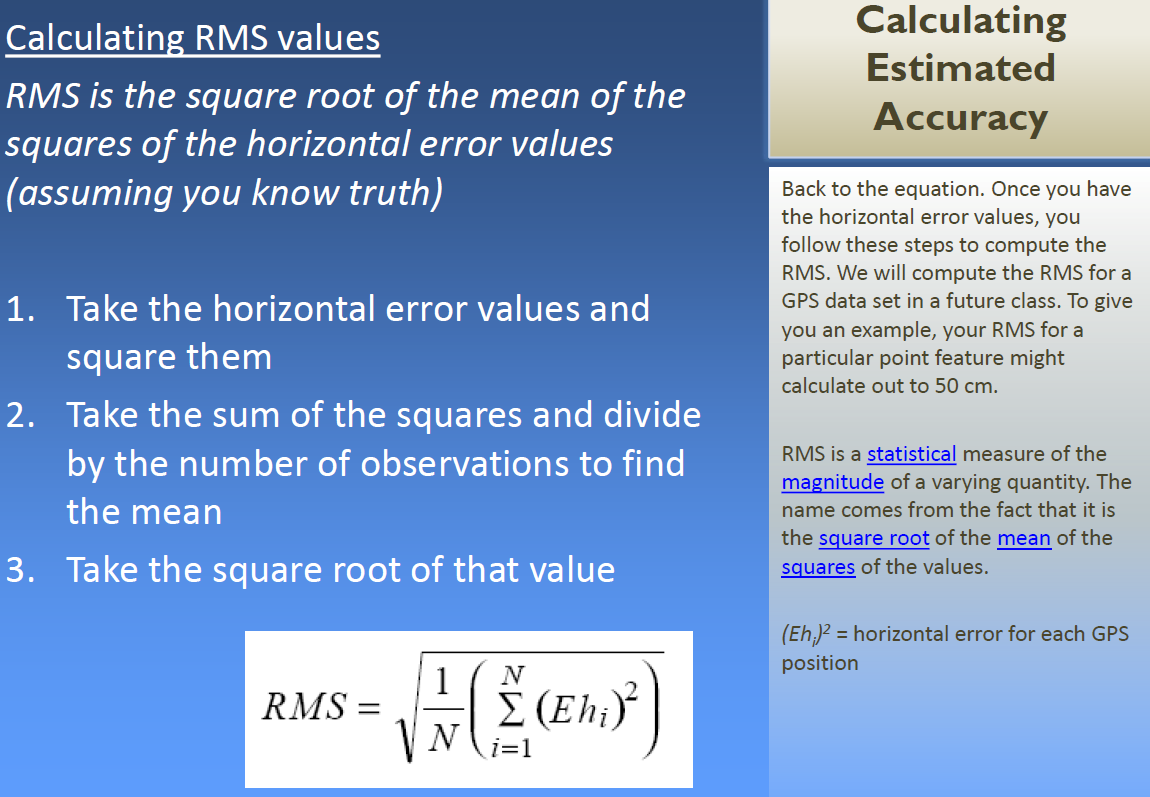 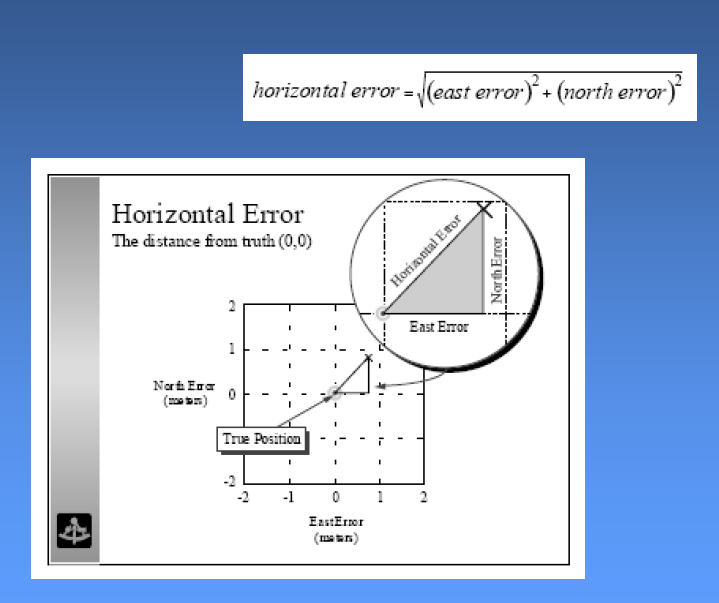

Lasketaan sisäisiä tarkkuuksia: vaaka-RMSE ja -2dRMSE. / Let's calculate inner accuracies (precision): Horizontal RMSE and 2dRMSE:

In [ ]:
def RMSE_horizontal_inner(coordinates1, mean1, coordinates2, mean2):
    horizontalerror_square = 0
    i = 0     
    while i < len(coordinates1):
        horizontalerror_square += (np.sqrt((coordinates1[i] - mean1)**2 + (coordinates2[i] - mean2)**2))**2
        i += 1
    RMSE = np.sqrt(horizontalerror_square/len(coordinates1))
    return RMSE

RMSE_horizontal_inner = RMSE_horizontal_inner(northcoordinates, mean_n, eastcoordinates, mean_e)
TWOdRMSE_horizontal_inner = RMSE_horizontal_inner * 2

# print('The precision of the point (inner accuracy) Horizontal RMSE is {}m (63-68% of the measurements, depends on the shape of the distribution) and Horizontal 2dRMSE {}m (95-98% of the measurements, depends on the shape of the distribution).'.format(round(RMSE_horizontal_inner, 3), round(TWOdRMSE_horizontal_inner, 3)))
precision_horizontal_text = 'The precision of the point (inner accuracy) Horizontal RMSE is {}m (63-68% of the measurements, depends on the shape of the distribution) and Horizontal 2dRMSE {}m (95-98% of the measurements, depends on the shape of the distribution).'.format(round(RMSE_horizontal_inner, 3), round(TWOdRMSE_horizontal_inner, 3))
texts_df.loc[5, 'Text'] = precision_horizontal_text

# luodaan DataFrame toiselle taulukolle myöhempää PDF-tiedostoa varten / create a DataFrame for the second table for later .pdf file creation:
table2 = {'Parameter': ['Horizontal RMSE*** \xb1 (m)'], 'Precision*': [round(RMSE_horizontal_inner, 3)], 'Accuracy**': [None]}
table2_df = pd.DataFrame(data = table2)

Lasketaan sisäisiä tarkkuuksia: korkeus-RMSE ja -2dRMSE. / Let's calculate inner accuracies (precision): Vertical RMSE and 2dRMSE:

In [ ]:
def RMSE_vertical_inner(coordinates, mean):
    verticalerror_square = 0
    i = 0     
    while i < len(coordinates):
        verticalerror_square += (np.sqrt((coordinates[i] - mean)**2))**2
        i += 1
    RMSE = np.sqrt(verticalerror_square/len(coordinates))
    return RMSE

RMSE_vertical_inner = RMSE_vertical_inner(heights, mean_h)
TWOdRMSE_vertical_inner = RMSE_vertical_inner * 2

# print('The precision of the point (inner accuracy) Vertical RMSE is {}m (63-68% of the measurements, depends on the shape of the distribution) and Vertical 2dRMSE {}m (95-98% of the measurements, depends on the shape of the distribution).'.format(round(RMSE_vertical_inner, 3), round(TWOdRMSE_vertical_inner, 3)))
precision_vertical_text = 'The precision of the point (inner accuracy) Vertical RMSE is {}m (63-68% of the measurements, depends on the shape of the distribution) and Vertical 2dRMSE {}m (95-98% of the measurements, depends on the shape of the distribution).'.format(round(RMSE_vertical_inner, 3), round(TWOdRMSE_vertical_inner, 3))
texts_df.loc[6, 'Text'] = precision_vertical_text

table2_df.loc[1] = ['Vertical RMSE**** \xb1 (m)', round(RMSE_vertical_inner, 3), None]
table2_df.loc[2] = ['Horizontal 2dRMSE*** \xb1 (m)', round(TWOdRMSE_horizontal_inner, 3), None]
table2_df.loc[3] = ['Vertical 2dRMSE**** \xb1 (m)', round(TWOdRMSE_vertical_inner, 3), None]
table2_df.loc[4] = ['North Coordinate Std \xb1 (m)', round(std_n, 4), None]
table2_df.loc[5] = ['East Coordinate Std \xb1 (m)', round(std_e, 4), None]
table2_df.loc[6] = ['Height Std \xb1 (m)', round(std_h, 4), None]
table2_df.loc[7] = ['North Coordinate Mean (m)', round(mean_n, 4), None]
table2_df.loc[8] = ['East Coordinate Mean (m)', round(mean_e, 4), None]
table2_df.loc[9] = ['Height Mean (m)', round(mean_h, 4), None]
table2_df.loc[10] = ['North Coordinate Median (m)', round(median_n, 4), None]
table2_df.loc[11] = ['East Coordinate Median (m)', round(median_e, 4), None]
table2_df.loc[12] = ['Height Median (m)', round(median_h, 4), None]

Piirretään kuvaajat sisäisille tarkkuuksille: vaakatarkkuudet. / Let's draw the figures for inner accuracies (precisions): horizontal precisions:

In [ ]:
def horizontal_errors_inner(coordinates1, mean1, coordinates2, mean2):
    horizontal_errors = np.zeros(shape=(len(coordinates1), 2))
    i = 0     
    while i < len(coordinates1):
        horizontal_errors[i, 0] = coordinates1[i] - mean1
        horizontal_errors[i, 1] = coordinates2[i] - mean2
        i += 1
    return horizontal_errors

horizontal_errors_inner = horizontal_errors_inner(northcoordinates, mean_n, eastcoordinates, mean_e)
horizontal_errors_inner_df = pd.DataFrame({'North Errors (m)':horizontal_errors_inner[:,0],'East Errors (m)':horizontal_errors_inner[:,1]})

fig = plt.figure(figsize=(15, 12))
fig.suptitle('{}'.format(name_of_GNSS_device_or_NRTK_method), fontsize = 20)
sns.scatterplot(x = 'East Errors (m)', y = 'North Errors (m)', data = horizontal_errors_inner_df)
plt.title('The PRECISION of the point (INNER accuracy) (m), number of measurements {}/{}: HORIZONTAL. Date: {}'.format(len(northcoordinates), len(northcoordinates) + len(abovetolerances), date[1]))

an = np.linspace(0, 2 * np.pi, 100)
plt.plot(RMSE_horizontal_inner * np.cos(an), RMSE_horizontal_inner * np.sin(an), color = 'lime', marker = '+', linestyle = '--', linewidth = 3)
plt.plot(TWOdRMSE_horizontal_inner * np.cos(an), TWOdRMSE_horizontal_inner * np.sin(an), color = 'orange', marker = '+', linestyle = '--', linewidth = 3)
# plt.axis('equal')
plt.axis([-(tolerance_north_east), tolerance_north_east, -(tolerance_north_east), tolerance_north_east])
plt.legend(('Horizontal RMSE: \xb1 {}m'.format(round(RMSE_horizontal_inner, 3)), 'Horizontal 2dRMSE: \xb1 {}m'.format(round(TWOdRMSE_horizontal_inner, 3)), 'Measurement'), loc = 1, shadow=True, handlelength=1.5, fontsize=10)
strFileG = '{0}{1}H_The PRECISION of the point (INNER accuracy) (m) HORIZONTAL.png'.format(session_folder_path, os.sep)
if os.path.isfile(strFileG):
    os.remove(strFileG)
fig.savefig('{0}{1}H_The PRECISION of the point (INNER accuracy) (m) HORIZONTAL.png'.format(session_folder_path, os.sep))
plt.show()

figures_df.loc[7, 'The Figure File Name'] = 'H_The PRECISION of the point (INNER accuracy) (m) HORIZONTAL.png'

Piirretään kuvaajat sisäisille tarkkuuksille: pohjoistarkkuudet. / Let's draw the figures for inner accuracies (precisions): North precisions:

In [ ]:
def RMSE_north_inner(coordinates, mean):
    northerror_square = 0
    i = 0     
    while i < len(coordinates):
        northerror_square += (np.sqrt((coordinates[i] - mean)**2))**2
        i += 1
    RMSE = np.sqrt(northerror_square/len(coordinates))
    return RMSE

RMSE_north_inner = RMSE_north_inner(northcoordinates, mean_n)
TWOdRMSE_north_inner = RMSE_north_inner * 2

def north_errors_inner(coordinates, mean):
    north_errors = np.zeros(shape=(len(coordinates), 2))
    i = 0     
    while i < len(coordinates):
        north_errors[i, 0] = coordinates[i] - mean
        north_errors[i, 1] = i + 1
        i += 1
    return north_errors

north_errors_inner = north_errors_inner(northcoordinates, mean_n)
north_errors_inner_df = pd.DataFrame({'North Errors (m)':north_errors_inner[:,0], 'The Number of the Measurement':north_errors_inner[:,1]})

fig = plt.figure(figsize=(15, 12))
fig.suptitle('{}'.format(name_of_GNSS_device_or_NRTK_method), fontsize = 20)
sns.lineplot(x = 'The Number of the Measurement', y = 'North Errors (m)', data = north_errors_inner_df)
plt.title('The PRECISION of the point (INNER accuracy) (m), number of measurements {}/{}: NORTH. Date: {}'.format(len(northcoordinates), len(northcoordinates) + len(abovetolerances), date[1]))
plt.plot([north_errors_inner_df.loc[0, 'The Number of the Measurement'], len(north_errors_inner_df)], [RMSE_north_inner, RMSE_north_inner], color = 'lime', linestyle = '--', linewidth = 3)
plt.plot([north_errors_inner_df.loc[0, 'The Number of the Measurement'], len(north_errors_inner_df)], [TWOdRMSE_north_inner, TWOdRMSE_north_inner], color = 'orange', linestyle = '--', linewidth = 3)
plt.plot([north_errors_inner_df.loc[0, 'The Number of the Measurement'], len(north_errors_inner_df)], [-RMSE_north_inner, -RMSE_north_inner], color = 'lime', linestyle = '--', linewidth = 3)
plt.plot([north_errors_inner_df.loc[0, 'The Number of the Measurement'], len(north_errors_inner_df)], [-TWOdRMSE_north_inner, -TWOdRMSE_north_inner], color = 'orange', linestyle = '--', linewidth = 3)
plt.axis([0, len(northcoordinates), -(tolerance_north_east), tolerance_north_east])
plt.legend(('North Errors (m)', 'North RMSE: \xb1 {}m'.format(round(RMSE_north_inner, 3)), 'North 2dRMSE: \xb1 {}m'.format(round(TWOdRMSE_north_inner, 3))), loc = 1, shadow=True, handlelength=1.5, fontsize=10)
strFileH = '{0}{1}I_The PRECISION of the point (INNER accuracy) (m) NORTH.png'.format(session_folder_path, os.sep)
if os.path.isfile(strFileH):
    os.remove(strFileH)
fig.savefig('{0}{1}I_The PRECISION of the point (INNER accuracy) (m) NORTH.png'.format(session_folder_path, os.sep))
plt.show()

figures_df.loc[8, 'The Figure File Name'] = 'I_The PRECISION of the point (INNER accuracy) (m) NORTH.png'

Piirretään kuvaajat sisäisille tarkkuuksille: itätarkkuudet. / Let's draw the figures for inner accuracies (precisions): East precisions:

In [ ]:
def RMSE_east_inner(coordinates, mean):
    easterror_square = 0
    i = 0     
    while i < len(coordinates):
        easterror_square += (np.sqrt((coordinates[i] - mean)**2))**2
        i += 1
    RMSE = np.sqrt(easterror_square/len(coordinates))
    return RMSE

RMSE_east_inner = RMSE_east_inner(eastcoordinates, mean_e)
TWOdRMSE_east_inner = RMSE_east_inner * 2

def east_errors_inner(coordinates, mean):
    east_errors = np.zeros(shape=(len(coordinates), 2))
    i = 0     
    while i < len(coordinates):
        east_errors[i, 0] = coordinates[i] - mean
        east_errors[i, 1] = i + 1
        i += 1
    return east_errors

east_errors_inner = east_errors_inner(eastcoordinates, mean_e)
east_errors_inner_df = pd.DataFrame({'East Errors (m)':east_errors_inner[:,0], 'The Number of the Measurement':east_errors_inner[:,1]})

fig = plt.figure(figsize=(15, 12))
fig.suptitle('{}'.format(name_of_GNSS_device_or_NRTK_method), fontsize = 20)
sns.lineplot(x = 'The Number of the Measurement', y = 'East Errors (m)', data = east_errors_inner_df)
plt.title('The PRECISION of the point (INNER accuracy) (m), number of measurements {}/{}: EAST. Date: {}'.format(len(eastcoordinates), len(eastcoordinates) + len(abovetolerances), date[1]))
plt.plot([east_errors_inner_df.loc[0, 'The Number of the Measurement'], len(east_errors_inner_df)], [RMSE_east_inner, RMSE_east_inner], color = 'lime', linestyle = '--', linewidth = 3)
plt.plot([east_errors_inner_df.loc[0, 'The Number of the Measurement'], len(east_errors_inner_df)], [TWOdRMSE_east_inner, TWOdRMSE_east_inner], color = 'orange', linestyle = '--', linewidth = 3)
plt.plot([east_errors_inner_df.loc[0, 'The Number of the Measurement'], len(east_errors_inner_df)], [-RMSE_east_inner, -RMSE_east_inner], color = 'lime', linestyle = '--', linewidth = 3)
plt.plot([east_errors_inner_df.loc[0, 'The Number of the Measurement'], len(east_errors_inner_df)], [-TWOdRMSE_east_inner, -TWOdRMSE_east_inner], color = 'orange', linestyle = '--', linewidth = 3)
plt.axis([0, len(eastcoordinates), -(tolerance_north_east), tolerance_north_east])
plt.legend(('East Errors (m)', 'East RMSE: \xb1 {}m'.format(round(RMSE_east_inner, 3)), 'East 2dRMSE: \xb1 {}m'.format(round(TWOdRMSE_east_inner, 3))), loc = 1, shadow=True, handlelength=1.5, fontsize=10)
strFileI = '{0}{1}J_The PRECISION of the point (INNER accuracy) (m) EAST.png'.format(session_folder_path, os.sep)
if os.path.isfile(strFileI):
    os.remove(strFileI)
fig.savefig('{0}{1}J_The PRECISION of the point (INNER accuracy) (m) EAST.png'.format(session_folder_path, os.sep))
plt.show()

figures_df.loc[9, 'The Figure File Name'] = 'J_The PRECISION of the point (INNER accuracy) (m) EAST.png'

Piirretään kuvaajat sisäisille tarkkuuksille: vertikaalitarkkuudet. / Let's draw the figures for inner accuracies (precisions): Vertical precisions:

In [ ]:
def vertical_errors_inner(coordinates, mean):
    vertical_errors = np.zeros(shape=(len(coordinates), 2))
    i = 0     
    while i < len(coordinates):
        vertical_errors[i, 0] = coordinates[i] - mean
        vertical_errors[i, 1] = i + 1
        i += 1
    return vertical_errors

vertical_errors_inner = vertical_errors_inner(heights, mean_h)
vertical_errors_inner_df = pd.DataFrame({'Vertical Errors (m)':vertical_errors_inner[:,0], 'The Number of the Measurement':vertical_errors_inner[:,1]})

fig = plt.figure(figsize=(15, 12))
fig.suptitle('{}'.format(name_of_GNSS_device_or_NRTK_method), fontsize = 20)
sns.lineplot(x = 'The Number of the Measurement', y = 'Vertical Errors (m)', data = vertical_errors_inner_df)
plt.title('The PRECISION of the point (INNER accuracy) (m), number of measurements {}/{}: VERTICAL. Date: {}'.format(len(northcoordinates), len(northcoordinates) + len(abovetolerances), date[1]))
plt.plot([vertical_errors_inner_df.loc[0, 'The Number of the Measurement'], len(vertical_errors_inner_df)], [RMSE_vertical_inner, RMSE_vertical_inner], color = 'lime', linestyle = '--', linewidth = 3)
plt.plot([vertical_errors_inner_df.loc[0, 'The Number of the Measurement'], len(vertical_errors_inner_df)], [TWOdRMSE_vertical_inner, TWOdRMSE_vertical_inner], color = 'orange', linestyle = '--', linewidth = 3)
plt.plot([vertical_errors_inner_df.loc[0, 'The Number of the Measurement'], len(vertical_errors_inner_df)], [-RMSE_vertical_inner, -RMSE_vertical_inner], color = 'lime', linestyle = '--', linewidth = 3)
plt.plot([vertical_errors_inner_df.loc[0, 'The Number of the Measurement'], len(vertical_errors_inner_df)], [-TWOdRMSE_vertical_inner, -TWOdRMSE_vertical_inner], color = 'orange', linestyle = '--', linewidth = 3)
plt.axis([0, len(northcoordinates), -(tolerance_height), tolerance_height])
plt.legend(('Vertical Errors (m)', 'Vertical RMSE: \xb1 {}m'.format(round(RMSE_vertical_inner, 3)), 'Vertical 2dRMSE: \xb1 {}m'.format(round(TWOdRMSE_vertical_inner, 3))), loc = 1, shadow=True, handlelength=1.5, fontsize=10)
strFileJ = '{0}{1}K_The PRECISION of the point (INNER accuracy) (m) VERTICAL.png'.format(session_folder_path, os.sep)
if os.path.isfile(strFileJ):
    os.remove(strFileJ)
fig.savefig('{0}{1}K_The PRECISION of the point (INNER accuracy) (m) VERTICAL.png'.format(session_folder_path, os.sep))
plt.show()

figures_df.loc[10, 'The Figure File Name'] = 'K_The PRECISION of the point (INNER accuracy) (m) VERTICAL.png'

Lasketaan ulkoisia tarkkuuksia: vaaka-RMSE ja -2dRMSE. / Let's calculate outer accuracies (accuracies): Horizontal RMSE and 2dRMSE.

In [ ]:
def RMSE_horizontal_outer(coordinates1, referencecoordinate1, coordinates2, referencecoordinate2):
    horizontalerror_square = 0
    i = 0     
    while i < len(coordinates1):
        horizontalerror_square += (np.sqrt((coordinates1[i] - referencecoordinate1)**2 + (coordinates2[i] - referencecoordinate2)**2))**2
        i += 1
    RMSE = np.sqrt(horizontalerror_square/len(coordinates1))
    return RMSE

RMSE_horizontal_outer = RMSE_horizontal_outer(northcoordinates, referencecoordinate_n, eastcoordinates, referencecoordinate_e)
TWOdRMSE_horizontal_outer = RMSE_horizontal_outer * 2

# print('The accuracy of the point (outer accuracy) Horizontal RMSE is {}m (63-68% of the measurements, depends on the shape of the distribution) and Horizontal 2dRMSE {}m (95-98% of the measurements, depends on the shape of the distribution).'.format(round(RMSE_horizontal_outer, 3), round(TWOdRMSE_horizontal_outer, 3)))
accuracy_horizontal_text = 'The accuracy of the point (outer accuracy) Horizontal RMSE is {}m (63-68% of the measurements, depends on the shape of the distribution) and Horizontal 2dRMSE {}m (95-98% of the measurements, depends on the shape of the distribution).'.format(round(RMSE_horizontal_outer, 3), round(TWOdRMSE_horizontal_outer, 3))
texts_df.loc[7, 'Text'] = accuracy_horizontal_text

table2_df.loc[0, 'Accuracy**'] = [round(RMSE_horizontal_outer, 3)]
table2_df.loc[2, 'Accuracy**'] = [round(TWOdRMSE_horizontal_outer, 3)]

Lasketaan ulkoisia tarkkuuksia: korkeus-RMSE ja -2dRMSE. / Let's calculate outer accuracies (accuracies): Vertical RMSE and 2dRMSE.

In [ ]:
def RMSE_vertical_outer(coordinates, referencecoordinate):
    verticalerror_square = 0
    i = 0     
    while i < len(coordinates):
        verticalerror_square += (np.sqrt((coordinates[i] - referencecoordinate)**2))**2
        i += 1
    RMSE = np.sqrt(verticalerror_square/len(coordinates))
    return RMSE

RMSE_vertical_outer = RMSE_vertical_outer(heights, referencecoordinate_h)
TWOdRMSE_vertical_outer = RMSE_vertical_outer * 2

# print('The accuracy of the point (outer accuracy) Vertical RMSE is {}m (63-68% of the measurements, depends on the shape of the distribution) and Vertical 2dRMSE {}m (95-98% of the measurements, depends on the shape of the distribution).'.format(round(RMSE_vertical_outer, 3), round(TWOdRMSE_vertical_outer, 3)))
accuracy_vertical_text = 'The accuracy of the point (outer accuracy) Vertical RMSE is {}m (63-68% of the measurements, depends on the shape of the distribution) and Vertical 2dRMSE {}m (95-98% of the measurements, depends on the shape of the distribution).'.format(round(RMSE_vertical_outer, 3), round(TWOdRMSE_vertical_outer, 3))
texts_df.loc[8, 'Text'] = accuracy_vertical_text

table2_df.loc[1, 'Accuracy**'] = [round(RMSE_vertical_outer, 3)]
table2_df.loc[3, 'Accuracy**'] = [round(TWOdRMSE_vertical_outer, 3)]

Piirretään kuvaajat ulkoisille tarkkuuksille: vaakatarkkuudet. / Let's draw the figures for outer accuracies (accuracies): Horizontal accuracies:

In [ ]:
def horizontal_errors_outer(coordinates1, referencecoordinate1, coordinates2, referencecoordinate2):
    horizontal_errors = np.zeros(shape=(len(coordinates1), 2))
    i = 0     
    while i < len(coordinates1):
        horizontal_errors[i, 0] = coordinates1[i] - referencecoordinate1
        horizontal_errors[i, 1] = coordinates2[i] - referencecoordinate2
        i += 1
    return horizontal_errors

horizontal_errors_outer = horizontal_errors_outer(northcoordinates, referencecoordinate_n, eastcoordinates, referencecoordinate_e)
horizontal_errors_outer_df = pd.DataFrame({'North Errors (m)':horizontal_errors_outer[:,0],'East Errors (m)':horizontal_errors_outer[:,1]})

fig = plt.figure(figsize=(15, 12))
fig.suptitle('{}'.format(name_of_GNSS_device_or_NRTK_method), fontsize = 20)
sns.scatterplot(x = 'East Errors (m)', y = 'North Errors (m)', data = horizontal_errors_outer_df)
plt.title('The ACCURACY of the point (OUTER accuracy) (m), number of measurements {}/{}: HORIZONTAL. Date: {}'.format(len(northcoordinates), len(northcoordinates) + len(abovetolerances), date[1]))

an = np.linspace(0, 2 * np.pi, 100)
plt.plot(RMSE_horizontal_outer * np.cos(an), RMSE_horizontal_outer * np.sin(an), color = 'lime', marker = '+', linestyle = '--', linewidth = 3)
plt.plot(TWOdRMSE_horizontal_outer * np.cos(an), TWOdRMSE_horizontal_outer * np.sin(an), color = 'orange', marker = '+', linestyle = '--', linewidth = 3)
# plt.axis('equal')
plt.axis([-(tolerance_north_east), tolerance_north_east, -(tolerance_north_east), tolerance_north_east])
plt.legend(('Horizontal RMSE: \xb1 {}m'.format(round(RMSE_horizontal_outer, 3)), 'Horizontal 2dRMSE: \xb1 {}m'.format(round(TWOdRMSE_horizontal_outer, 3)), 'Measurement'), loc = 1, shadow=True, handlelength=1.5, fontsize=10)
strFileK = '{0}{1}L_The ACCURACY of the point (OUTER accuracy) (m) HORIZONTAL.png'.format(session_folder_path, os.sep)
if os.path.isfile(strFileK):
    os.remove(strFileK)
fig.savefig('{0}{1}L_The ACCURACY of the point (OUTER accuracy) (m) HORIZONTAL.png'.format(session_folder_path, os.sep))
plt.show()

figures_df.loc[11, 'The Figure File Name'] = 'L_The ACCURACY of the point (OUTER accuracy) (m) HORIZONTAL.png'

Piirretään kuvaajat ulkoisille tarkkuuksille. pohjoistarkkuudet. / Let's draw the figures for outer accuracies (accuracies): North accuracies:

In [ ]:
def RMSE_north_outer(coordinates, referencecoordinate):
    northerror_square = 0
    i = 0     
    while i < len(coordinates):
        northerror_square += (np.sqrt((coordinates[i] - referencecoordinate)**2))**2
        i += 1
    RMSE = np.sqrt(northerror_square/len(coordinates))
    return RMSE

RMSE_north_outer = RMSE_north_outer(northcoordinates, referencecoordinate_n)
TWOdRMSE_north_outer = RMSE_north_outer * 2

def north_errors_outer(coordinates, referencecoordinate):
    north_errors = np.zeros(shape=(len(coordinates), 2))
    i = 0     
    while i < len(coordinates):
        north_errors[i, 0] = coordinates[i] - referencecoordinate
        north_errors[i, 1] = i + 1
        i += 1
    return north_errors

north_errors_outer = north_errors_outer(northcoordinates, referencecoordinate_n)
north_errors_outer_df = pd.DataFrame({'North Errors (m)':north_errors_outer[:,0], 'The Number of the Measurement':north_errors_outer[:,1]})

fig = plt.figure(figsize=(15, 12))
fig.suptitle('{}'.format(name_of_GNSS_device_or_NRTK_method), fontsize = 20)
sns.lineplot(x = 'The Number of the Measurement', y = 'North Errors (m)', data = north_errors_outer_df)
plt.title('The ACCURACY of the point (OUTER accuracy) (m), number of measurements {}/{}: NORTH. Date: {}'.format(len(northcoordinates), len(northcoordinates) + len(abovetolerances), date[1]))
plt.plot([north_errors_outer_df.loc[0, 'The Number of the Measurement'], len(north_errors_outer_df)], [RMSE_north_outer, RMSE_north_outer], color = 'lime', linestyle = '--', linewidth = 3)
plt.plot([north_errors_outer_df.loc[0, 'The Number of the Measurement'], len(north_errors_outer_df)], [TWOdRMSE_north_outer, TWOdRMSE_north_outer], color = 'orange', linestyle = '--', linewidth = 3)
plt.plot([north_errors_outer_df.loc[0, 'The Number of the Measurement'], len(north_errors_outer_df)], [-RMSE_north_outer, -RMSE_north_outer], color = 'lime', linestyle = '--', linewidth = 3)
plt.plot([north_errors_outer_df.loc[0, 'The Number of the Measurement'], len(north_errors_outer_df)], [-TWOdRMSE_north_outer, -TWOdRMSE_north_outer], color = 'orange', linestyle = '--', linewidth = 3)
plt.axis([0, len(northcoordinates), -(tolerance_north_east), tolerance_north_east])
plt.legend(('North Errors (m)', 'North RMSE: \xb1 {}m'.format(round(RMSE_north_outer, 3)), 'North 2dRMSE: \xb1 {}m'.format(round(TWOdRMSE_north_outer, 3))), loc = 1, shadow=True, handlelength=1.5, fontsize=10)
strFileL = '{0}{1}M_The ACCURACY of the point (OUTER accuracy) (m) NORTH.png'.format(session_folder_path, os.sep)
if os.path.isfile(strFileL):
    os.remove(strFileL)
fig.savefig('{0}{1}M_The ACCURACY of the point (OUTER accuracy) (m) NORTH.png'.format(session_folder_path, os.sep))
plt.show()

figures_df.loc[12, 'The Figure File Name'] = 'M_The ACCURACY of the point (OUTER accuracy) (m) NORTH.png'

Piirretään kuvaajat ulkoisille tarkkuuksille: itätarkkuudet. / Let's draw the figures for outer accuracies (accuracies): East accuracies:

In [ ]:
def RMSE_east_outer(coordinates, referencecoordinate):
    easterror_square = 0
    i = 0     
    while i < len(coordinates):
        easterror_square += (np.sqrt((coordinates[i] - referencecoordinate)**2))**2
        i += 1
    RMSE = np.sqrt(easterror_square/len(coordinates))
    return RMSE

RMSE_east_outer = RMSE_east_outer(eastcoordinates, referencecoordinate_e)
TWOdRMSE_east_outer = RMSE_east_outer * 2

def east_errors_outer(coordinates, referencecoordinate):
    east_errors = np.zeros(shape=(len(coordinates), 2))
    i = 0     
    while i < len(coordinates):
        east_errors[i, 0] = coordinates[i] - referencecoordinate
        east_errors[i, 1] = i + 1
        i += 1
    return east_errors

east_errors_outer = east_errors_outer(eastcoordinates, referencecoordinate_e)
east_errors_outer_df = pd.DataFrame({'East Errors (m)':east_errors_outer[:,0], 'The Number of the Measurement':east_errors_outer[:,1]})

fig = plt.figure(figsize=(15, 12))
fig.suptitle('{}'.format(name_of_GNSS_device_or_NRTK_method), fontsize = 20)
sns.lineplot(x = 'The Number of the Measurement', y = 'East Errors (m)', data = east_errors_outer_df)
plt.title('The ACCURACY of the point (OUTER accuracy) (m), number of measurements {}/{}: EAST. Date: {}'.format(len(eastcoordinates), len(eastcoordinates) + len(abovetolerances), date[1]))
plt.plot([east_errors_outer_df.loc[0, 'The Number of the Measurement'], len(east_errors_outer_df)], [RMSE_east_outer, RMSE_east_outer], color = 'lime', linestyle = '--', linewidth = 3)
plt.plot([east_errors_outer_df.loc[0, 'The Number of the Measurement'], len(east_errors_outer_df)], [TWOdRMSE_east_outer, TWOdRMSE_east_outer], color = 'orange', linestyle = '--', linewidth = 3)
plt.plot([east_errors_outer_df.loc[0, 'The Number of the Measurement'], len(east_errors_outer_df)], [-RMSE_east_outer, -RMSE_east_outer], color = 'lime', linestyle = '--', linewidth = 3)
plt.plot([east_errors_outer_df.loc[0, 'The Number of the Measurement'], len(east_errors_outer_df)], [-TWOdRMSE_east_outer, -TWOdRMSE_east_outer], color = 'orange', linestyle = '--', linewidth = 3)
plt.axis([0, len(eastcoordinates), -(tolerance_north_east), tolerance_north_east])
plt.legend(('East Errors (m)', 'East RMSE: \xb1 {}m'.format(round(RMSE_east_outer, 3)), 'East 2dRMSE: \xb1 {}m'.format(round(TWOdRMSE_east_outer, 3))), loc = 1, shadow=True, handlelength=1.5, fontsize=10)
strFileM = '{0}{1}N_The ACCURACY of the point (OUTER accuracy) (m) EAST.png'.format(session_folder_path, os.sep)
if os.path.isfile(strFileM):
    os.remove(strFileM)
fig.savefig('{0}{1}N_The ACCURACY of the point (OUTER accuracy) (m) EAST.png'.format(session_folder_path, os.sep))
plt.show()

figures_df.loc[13, 'The Figure File Name'] = 'N_The ACCURACY of the point (OUTER accuracy) (m) EAST.png'

Piirretään kuvaajat ulkoisille tarkkuuksille: vertikaalitarkkuudet. / Let's draw the figures for outer accuracies (accuracies): Vertical accuracies:

In [ ]:
def RMSE_vertical_outer(coordinates, referencecoordinate):
    verticalerror_square = 0
    i = 0     
    while i < len(coordinates):
        verticalerror_square += (np.sqrt((coordinates[i] - referencecoordinate)**2))**2
        i += 1
    RMSE = np.sqrt(verticalerror_square/len(coordinates))
    return RMSE

RMSE_vertical_outer = RMSE_vertical_outer(heights, referencecoordinate_h)
TWOdRMSE_vertical_outer = RMSE_vertical_outer * 2

def vertical_errors_outer(coordinates, referencecoordinate):
    vertical_errors = np.zeros(shape=(len(coordinates), 2))
    i = 0     
    while i < len(coordinates):
        vertical_errors[i, 0] = coordinates[i] - referencecoordinate
        vertical_errors[i, 1] = i + 1
        i += 1
    return vertical_errors

vertical_errors_outer = vertical_errors_outer(heights, referencecoordinate_h)
vertical_errors_outer_df = pd.DataFrame({'Vertical Errors (m)':vertical_errors_outer[:,0], 'The Number of the Measurement':vertical_errors_outer[:,1]})

fig = plt.figure(figsize=(15, 12))
fig.suptitle('{}'.format(name_of_GNSS_device_or_NRTK_method), fontsize = 20)
sns.lineplot(x = 'The Number of the Measurement', y = 'Vertical Errors (m)', data = vertical_errors_outer_df)
plt.title('The ACCURACY of the point (OUTER accuracy) (m), number of measurements {}/{}: VERTICAL. Date: {}'.format(len(heights), len(heights) + len(abovetolerances), date[1]))
plt.plot([vertical_errors_outer_df.loc[0, 'The Number of the Measurement'], len(vertical_errors_outer_df)], [RMSE_vertical_outer, RMSE_vertical_outer], color = 'lime', linestyle = '--', linewidth = 3)
plt.plot([vertical_errors_outer_df.loc[0, 'The Number of the Measurement'], len(vertical_errors_outer_df)], [TWOdRMSE_vertical_outer, TWOdRMSE_vertical_outer], color = 'orange', linestyle = '--', linewidth = 3)
plt.plot([vertical_errors_outer_df.loc[0, 'The Number of the Measurement'], len(vertical_errors_outer_df)], [-RMSE_vertical_outer, -RMSE_vertical_outer], color = 'lime', linestyle = '--', linewidth = 3)
plt.plot([vertical_errors_outer_df.loc[0, 'The Number of the Measurement'], len(vertical_errors_outer_df)], [-TWOdRMSE_vertical_outer, -TWOdRMSE_vertical_outer], color = 'orange', linestyle = '--', linewidth = 3)
plt.axis([0, len(northcoordinates), -(tolerance_height), tolerance_height])
plt.legend(('Vertical Errors (m)', 'Vertical RMSE: \xb1 {}m'.format(round(RMSE_vertical_outer, 3)), 'Vertical 2dRMSE: \xb1 {}m'.format(round(TWOdRMSE_vertical_outer, 3))), loc = 1, shadow=True, handlelength=1.5, fontsize=10)
strFileN = '{0}{1}O_The ACCURACY of the point (OUTER accuracy) (m) VERTICAL.png'.format(session_folder_path, os.sep)
if os.path.isfile(strFileN):
    os.remove(strFileN)
fig.savefig('{0}{1}O_The ACCURACY of the point (OUTER accuracy) (m) VERTICAL.png'.format(session_folder_path, os.sep))
plt.show()

figures_df.loc[14, 'The Figure File Name'] = 'O_The ACCURACY of the point (OUTER accuracy) (m) VERTICAL.png'

Piirretään kuvaajat sisäisille tarkkuuksille ja DOP-arvoille havaintojen funktiona: vaakatarkkuudet. / Let's draw the figures for inner accuracies (precisions) and DOP values as a function of the measurements: horizontal precisions:

In [ ]:
horizontal_errors_inner_df['Horizontal Errors (m)'] = ((horizontal_errors_inner_df.loc[:, 'East Errors (m)'])**2 + (horizontal_errors_inner_df.loc[:, 'North Errors (m)'])**2).pow(1./2)
horizontal_errors_inner_df['The Number of the Measurement'] = range(0, len(horizontal_errors_inner_df))
x = range(len(testmeasurements_df_no_outliers.loc[:, 'HDOP']))
y = [testmeasurements_df_no_outliers.loc[:, 'HDOP']]
mean_HDOP = round(testmeasurements_df_no_outliers.loc[:, 'HDOP'].mean(), 1)

fig, ax1 = plt.subplots(figsize=(15, 12))
fig.suptitle('{}'.format(name_of_GNSS_device_or_NRTK_method), fontsize = 20)
ax1.stackplot(x, y, labels=['HDOP (Mean = {})'.format(mean_HDOP)], alpha=0.5)
ax1.set_xlabel('The Number of the Measurement', fontsize=14)
ax1.set_ylabel('DOP Value', fontsize=14)
ax1.legend(bbox_to_anchor=(-0.005, -0.1), loc='lower left', fontsize=12)
ax1.tick_params(axis='y', labelsize = 12)

color = (0.8941176470588236, 0.10196078431372549, 0.10980392156862745)
ax2 = ax1.twinx()
ax2 = sns.lineplot(x = 'The Number of the Measurement', y = 'Horizontal Errors (m)', data = horizontal_errors_inner_df, color = color, linewidth = 1)
ax2.set_title('The Horizontal PRECISION of the point (INNER accuracy) (m) with DOP values, number of measurements {}/{}: HORIZONTAL. Date: {}'.format(len(horizontal_errors_inner_df), len(horizontal_errors_inner_df) + len(abovetolerances), date[1]), fontsize=15)
ax2.set_ylabel('Horizontal Errors (m)', fontsize = 14)
ax3 = plt.plot([len(horizontal_errors_inner_df) - (len(horizontal_errors_inner_df)) / 10, len(horizontal_errors_inner_df)], [RMSE_horizontal_inner, RMSE_horizontal_inner], color = 'lime', linestyle = '--', linewidth = 5)
ax4 = plt.plot([len(horizontal_errors_inner_df) - (len(horizontal_errors_inner_df)) / 10, len(horizontal_errors_inner_df)], [TWOdRMSE_horizontal_inner, TWOdRMSE_horizontal_inner], color = 'gold', linestyle = '--', linewidth = 5)
ax2.legend(('Horizontal Errors \xb1 (m)', 'Horizontal RMSE \xb1 {}m'.format(round(RMSE_horizontal_inner, 3)), 'Horizontal 2dRMSE \xb1 {}m'.format(round(TWOdRMSE_horizontal_inner, 3))), shadow=True, handlelength=1.5, fontsize=12, bbox_to_anchor=(0.775, -0.15), loc = 'lower left')
ax2.tick_params(axis='y', labelcolor=color, labelsize = 12)
strFileO = '{0}{1}P_The Horizontal PRECISION of the point (INNER accuracy) (m) with DOP values.png'.format(session_folder_path, os.sep)
if os.path.isfile(strFileO):
    os.remove(strFileO)
fig.savefig('{0}{1}P_The Horizontal PRECISION of the point (INNER accuracy) (m) with DOP values.png'.format(session_folder_path, os.sep))
plt.show()

figures_df.loc[15, 'The Figure File Name'] = 'P_The Horizontal PRECISION of the point (INNER accuracy) (m) with DOP values.png'

Piirretään kuvaajat sisäisille tarkkuuksille ja DOP-arvoille havaintojen funktiona: 3D-tarkkuudet. / Let's draw the figures for inner accuracies (precisions) and DOP values as a function of the measurements: 3D precisions:

In [ ]:
def THREED_errors_inner(coordinates1, mean1, coordinates2, mean2, coordinates3, mean3):
    THREED_errors = np.zeros(shape=(len(coordinates1), 3))
    i = 0     
    while i < len(coordinates1):
        THREED_errors[i, 0] = coordinates1[i] - mean1
        THREED_errors[i, 1] = coordinates2[i] - mean2
        THREED_errors[i, 2] = coordinates3[i] - mean3
        i += 1
    return THREED_errors

THREED_errors_inner = THREED_errors_inner(northcoordinates, mean_n, eastcoordinates, mean_e, heights, mean_h)
THREED_errors_inner_df = pd.DataFrame({'North Errors (m)':THREED_errors_inner[:,0], 'East Errors (m)':THREED_errors_inner[:,1], 'Height Errors (m)':THREED_errors_inner[:,2]})

# ----------------------------------------------------------------------------------
def RMSE_THREED_inner(coordinates1, mean1, coordinates2, mean2, coordinates3, mean3):
    THREEDerror_square = 0
    i = 0     
    while i < len(coordinates1):
        THREEDerror_square += (np.sqrt((coordinates1[i] - mean1)**2 + (coordinates2[i] - mean2)**2) + (coordinates3[i] - mean3)**2)**2
        i += 1
    RMSE = np.sqrt(THREEDerror_square/len(coordinates1))
    return RMSE

RMSE_THREED_inner = RMSE_THREED_inner(northcoordinates, mean_n, eastcoordinates, mean_e, heights, mean_h)
TWOdRMSE_THREED_inner = RMSE_THREED_inner * 2

# ----------------------------------------------------------------------------------

THREED_errors_inner_df['3D Errors (m)'] = ((THREED_errors_inner_df.loc[:, 'East Errors (m)'])**2 + (THREED_errors_inner_df.loc[:, 'North Errors (m)'])**2 + (THREED_errors_inner_df.loc[:, 'Height Errors (m)'])**2).pow(1./2)
THREED_errors_inner_df['The Number of the Measurement'] = range(0, len(THREED_errors_inner_df))
x = range(len(testmeasurements_df_no_outliers.loc[:, 'HDOP']))
y = [testmeasurements_df_no_outliers.loc[:, 'PDOP']]
mean_PDOP = round(testmeasurements_df_no_outliers.loc[:, 'PDOP'].mean(), 1)

fig, ax1 = plt.subplots(figsize=(15, 12))
fig.suptitle('{}'.format(name_of_GNSS_device_or_NRTK_method), fontsize = 20)
ax1.stackplot(x, y, labels=['PDOP (Mean = {})'.format(mean_PDOP)], color = (0.30196078431372547, 0.6862745098039216, 0.2901960784313726), alpha=0.7)
ax1.set_xlabel('The Number of the Measurement', fontsize=14)
ax1.set_ylabel('DOP Value', fontsize=14)
ax1.legend(bbox_to_anchor=(-0.005, -0.1), loc='lower left', fontsize=12)
ax1.tick_params(axis='y', labelsize = 12)

color = (0.596078431372549, 0.3058823529411765, 0.6392156862745098)
ax2 = ax1.twinx()
ax2 = sns.lineplot(x = 'The Number of the Measurement', y = '3D Errors (m)', data = THREED_errors_inner_df, color = color, linewidth = 1)
ax2.set_title('The 3D PRECISION of the point (INNER accuracy) (m) with DOP values, number of measurements {}/{}: 3D. Date: {}'.format(len(THREED_errors_inner_df), len(THREED_errors_inner_df) + len(abovetolerances), date[1]), fontsize=15)
ax2.set_ylabel('3D Errors (m)', fontsize = 14)
ax3 = plt.plot([len(THREED_errors_inner_df) - (len(THREED_errors_inner_df)) / 10, len(THREED_errors_inner_df)], [RMSE_THREED_inner, RMSE_THREED_inner], color = 'lime', linestyle = '--', linewidth = 5)
ax4 = plt.plot([len(THREED_errors_inner_df) - (len(THREED_errors_inner_df)) / 10, len(THREED_errors_inner_df)], [TWOdRMSE_THREED_inner, TWOdRMSE_THREED_inner], color = 'gold', linestyle = '--', linewidth = 5)
ax2.legend(('3D Errors \xb1 (m)', '3D RMSE \xb1 {}m'.format(round(RMSE_THREED_inner, 3)), '3D 2dRMSE \xb1 {}m'.format(round(TWOdRMSE_THREED_inner, 3))), shadow=True, handlelength=1.5, fontsize=12, bbox_to_anchor=(0.775, -0.15), loc = 'lower left')
ax2.tick_params(axis='y', labelcolor=color, labelsize = 12)
strFileP = '{0}{1}Q_The 3D PRECISION of the point (INNER accuracy) (m) with DOP values.png'.format(session_folder_path, os.sep)
if os.path.isfile(strFileP):
    os.remove(strFileP)
fig.savefig('{0}{1}Q_The 3D PRECISION of the point (INNER accuracy) (m) with DOP values.png'.format(session_folder_path, os.sep))
plt.show()

figures_df.loc[16, 'The Figure File Name'] = 'Q_The 3D PRECISION of the point (INNER accuracy) (m) with DOP values.png'

Piirretään kuvaajat sisäisille tarkkuuksille ja DOP-arvoille havaintojen funktiona: vertikaalitarkkuudet. / Let's draw the figures for inner accuracies (precisions) and DOP values as a function of the measurements: vertical precisions::

In [ ]:
vertical_errors_inner_df['The Number of the Measurement'] = range(0, len(vertical_errors_inner_df))
x = range(len(testmeasurements_df_no_outliers.loc[:, 'HDOP']))
y = [testmeasurements_df_no_outliers.loc[:, 'VDOP']]
mean_VDOP = round(testmeasurements_df_no_outliers.loc[:, 'VDOP'].mean(), 1)

fig, ax1 = plt.subplots(figsize=(15, 12))
fig.suptitle('{}'.format(name_of_GNSS_device_or_NRTK_method), fontsize = 20)
ax1.stackplot(x, y, labels=['VDOP (Mean = {})'.format(mean_VDOP)], alpha=0.7, color = (1.0, 0.4980392156862745, 0.0))
ax1.set_xlabel('The Number of the Measurement', fontsize=14)
ax1.set_ylabel('DOP Value', fontsize=14)
ax1.legend(bbox_to_anchor=(-0.005, -0.1), loc='lower left', fontsize=12)
ax1.tick_params(axis='y', labelsize = 12)

color = (0.21568627450980393, 0.49411764705882355, 0.7215686274509804)
ax2 = ax1.twinx()
ax2 = sns.lineplot(x = 'The Number of the Measurement', y = 'Vertical Errors (m)', data = vertical_errors_inner_df, color = color, linewidth = 1)
ax2.set_title('The Vertical PRECISION of the point (INNER accuracy) (m) with DOP values, number of measurements {}/{}: VERTICAL. Date: {}'.format(len(vertical_errors_inner_df), len(vertical_errors_inner_df) + len(abovetolerances), date[1]), fontsize=15)
ax2.set_ylabel('Vertical Errors (m)', fontsize = 14)
ax3 = plt.plot([vertical_errors_inner_df.loc[0, 'The Number of the Measurement'], len(vertical_errors_inner_df)], [RMSE_vertical_inner, RMSE_vertical_inner], color = 'lime', linestyle = '--', linewidth = 5)
ax4 = plt.plot([vertical_errors_inner_df.loc[0, 'The Number of the Measurement'], len(vertical_errors_inner_df)], [TWOdRMSE_vertical_inner, TWOdRMSE_vertical_inner], color = 'gold', linestyle = '--', linewidth = 5)
ax5 = plt.plot([vertical_errors_inner_df.loc[0, 'The Number of the Measurement'], len(vertical_errors_inner_df)], [-RMSE_vertical_inner, -RMSE_vertical_inner], color = 'lime', linestyle = '--', linewidth = 5)
ax6 = plt.plot([vertical_errors_inner_df.loc[0, 'The Number of the Measurement'], len(vertical_errors_inner_df)], [-TWOdRMSE_vertical_inner, -TWOdRMSE_vertical_inner], color = 'gold', linestyle = '--', linewidth = 5)
ax2.legend(('Vertical Errors (m)', 'Vertical RMSE \xb1 {}m'.format(round(RMSE_vertical_inner, 3)), 'Vertical 2dRMSE \xb1 {}m'.format(round(TWOdRMSE_vertical_inner, 3))), shadow=True, handlelength=1.5, fontsize=12, bbox_to_anchor=(0.775, -0.15), loc = 'lower left')
ax2.tick_params(axis='y', labelcolor=color, labelsize = 12)
strFileQ = '{0}{1}R_The Vertical PRECISION of the point (INNER accuracy) (m) with DOP values.png'.format(session_folder_path, os.sep)
if os.path.isfile(strFileQ):
    os.remove(strFileQ)
fig.savefig('{0}{1}R_The Vertical PRECISION of the point (INNER accuracy) (m) with DOP values.png'.format(session_folder_path, os.sep))
plt.show()

figures_df.loc[17, 'The Figure File Name'] = 'R_The Vertical PRECISION of the point (INNER accuracy) (m) with DOP values.png'

Tehdään .pdf-tiedosto./ Let's produce a .pdf-file:

In [ ]:
# https://www.reportlab.com/docs/reportlab-userguide.pdf
# https://leanpub.com/reportlab
# https://www.blog.pythonlibrary.org/2010/03/08/a-simple-step-by-step-reportlab-tutorial/

import glob
import re

from reportlab.lib import colors
from reportlab.lib.styles import ParagraphStyle as PS
from reportlab.platypus import SimpleDocTemplate, Paragraph, Image, PageBreak, Table, TableStyle
from reportlab.platypus.doctemplate import PageTemplate, BaseDocTemplate
from reportlab.platypus.doctemplate import Frame
from reportlab.platypus.tableofcontents import TableOfContents
from reportlab.lib.pagesizes import A1, A2, A3, A4
from reportlab.lib.units import cm
import string
import datetime
from time import strftime

# ------------------------------------------------------------------------------------------
class MyDocTemplate(BaseDocTemplate):
    
    def __init__(self, filename, **kw):
        self.allowSplitting = 0
        BaseDocTemplate.__init__(self, filename, **kw)
        template = PageTemplate('normal', [Frame(2.5*cm, 2.5*cm, 15*cm, 25*cm, id='F1')])
        self.addPageTemplates(template)

    def afterFlowable(self, flowable):
        "Registers TOC entries."
        if flowable.__class__.__name__ == 'Paragraph':
            text = flowable.getPlainText()
            style = flowable.style.name
            if style == 'Heading1':
                self.notify('TOCEntry', (0, text, self.page))
            if style == 'Heading2':
                self.notify('TOCEntry', (1, text, self.page))

h_title = PS(name = 'h_title', fontSize = 36, leading = 18)             
h1 = PS(name = 'Heading1', fontSize = 14, leading = 16)
h2 = PS(name = 'Heading2', fontSize = 12, leading = 14, leftIndent = 1*cm)
# ------------------------------------------------------------------------------------------
def create_pdf(fname, front_cover, back_cover, path_figures, path_session, testmeasurements_name, encrypt_pswd):
    filename = '{0}{3}{1}{2}'.format(path_session, fname, '.pdf', os.sep)
    doc = SimpleDocTemplate(filename, pagesize = A4, rightMargin = 0, leftMargin= 0, topMargin = 0, bottomMargin= 0)
    Story = []
    toc = TableOfContents()
    width = 12.5*cm
    height = 6*cm    
    figs = []
    toc.levelStyles = [h1, h2]
    Story.append(Paragraph('This PDF document was produced:', PS('body')))
    now1 = datetime.datetime.now()
    now1 = now1.strftime('%Y-%m-%d %H:%M:%S')
    now2 = str(datetime.date.today())
    Story.append(Paragraph(now1, PS('body')))
    Story.append(Paragraph('<br/><br/><br/><br/><br/><br/><br/>NLS GNSS SOFAMESA<br/><br/>', h_title))
    Story.append(Paragraph('GNSS Position Solution Analysis Software of the National Land Survey of Finland<br/>Beta Version 0.2<br/>{}<br/><br/><br/><br/><br/><br/><br/>'.format(now2), PS('body')))
    Story.append(Paragraph('Measurement Report of <br/><br/>the File: <br/>', h_title))
    Story.append(Paragraph('<br/><br/>{0}<br/><br/>Timespan: {1} - {2}<br/><br/><br/><br/>'.format(testmeasurements_name, testmeasurements_df['Time'].iloc[0], testmeasurements_df['Time'].iloc[-1]), PS('body')))
    Story.append(Image(front_cover, width, height))
    credits = ('\nAuthor: Tuukka Mattila.\nDo not hesitate to contact via LinkedIn: https://www.linkedin.com/in/tuukkamattila/.\n\nThank you for the help: Topi Rikkinen, Marko Ollikainen, Antti Laaksonen, Hannu Koivula, Octavian Andrei, Mikael Kauhava, Timo Sallinen and Ari Huvinen.').replace('\n','<br />\n')
    Story.append(Paragraph(credits, PS('body')))
    Story.append(PageBreak())
    Story.append(toc)
    Story.append(PageBreak())
    Story.append(Paragraph('Statistics Behind the Figures <br/><br/>', h1))
    tb1 = Table(np.vstack((list(table1_df), np.array(table1_df))).tolist())
    tb1style = TableStyle([('FONT', (0, 0), (-1, 0), 'Helvetica-Bold', 12),
                           ('FONT', (0, 1), (0, -1), 'Helvetica-Bold'),
                           ('GRID', (0, 0), (-1,-1), 0.5, colors.blue),
                           ('LINEABOVE', (0, 0), (-1, 0), 2.5, colors.blue),
                           ('ALIGN', (-1, 0), (-1, -1), 'CENTER'),
                          ('LINEBELOW', (0, 0), (-1, 0), 2.5, colors.blue),
                          ('LINEBEFORE', (0, 0), (0, -1), 2.5, colors.blue),
                           ('LINEAFTER', (-1, 0), (-1, -1), 2.5, colors.blue)])
    tb1.setStyle(tb1style)
    tb2 = Table(np.vstack((list(table2_df), np.array(table2_df))).tolist())
    tb2style = TableStyle([('FONT', (0, 0), (-1, 0), 'Helvetica-Bold', 12),
                           ('FONT', (0, 1), (0, -1), 'Helvetica-Bold'),
                           ('GRID', (0, 0), (-1,-1), 0.5, colors.green),
                           ('LINEABOVE', (0, 0), (-1, 0), 2.5, colors.green),
                           ('ALIGN', (-2, 0), (-1, -1), 'CENTER'),
                          ('LINEBELOW', (0, 0), (-1, 0), 2.5, colors.green),
                          ('LINEBEFORE', (0, 0), (0, -1), 2.5, colors.green),
                           ('LINEAFTER', (-1, 0), (-1, -1), 2.5, colors.green)])
    tb2.setStyle(tb2style)
    Story.append(tb1)
    Story.append(Paragraph('<br/><br/>', PS('body')))
    Story.append(PageBreak())
    Story.append(tb2)
    Story.append(Paragraph('<br/><br/>', PS('body')))
    Story.append(Paragraph('* The precision of the measurements = inner accuracy.<br/><br/>', PS('body')))
    Story.append(Paragraph('** The accuracy of the measurements = outer accuracy.<br/><br/>', PS('body')))
    Story.append(Paragraph('*** Horizontal RMSE is 63-68% of the measurements and it depends on the shape of the distribution. Horizontal 2dRMSE is 95-98% of the measurements and it also depends on the shape of the distribution.<br/><br/>', PS('body')))
    Story.append(Paragraph('**** Vertical RMSE is 63-68% of the measurements and it depends on the shape of the distribution. Vertical 2dRMSE is 95-98% of the measurements and it also depends on the shape of the distribution.<br/><br/>', PS('body')))
    Story.append(PageBreak())
    Story.append(Paragraph('Figures <br/><br/>', h1))
    Story.append(Paragraph('Please find the figures, which NLS GNSS SOFAMESA produces, on the upcoming pages.', PS('body')))
    Story.append(PageBreak())
    for index, row in figures_df.itertuples():
        fig_title = figures_df.loc[index, 'The Figure File Name'].split('.')[0]
        fig_title = fig_title.split('_')[1]
        Story.append(Paragraph('{}'.format(fig_title), h2))
        Story.append(Paragraph('<br/><br/>', PS('body')))
        width1 = 20*cm
        height1 = 15*cm
        im = Image(pathlib.Path(path_figures).joinpath(row), width1, height1)
        im.hAlign = 'CENTER'
        Story.append(im)
        Story.append(PageBreak())
    Story.append(Paragraph('Conclusions', h1))
    Story.append(PageBreak())
    Story.append(Paragraph('This PDF document was produced:', PS('body')))
    now1 = datetime.datetime.now()
    now1 = now1.strftime('%Y-%m-%d %H:%M:%S')
    Story.append(Paragraph(now1, PS('body')))
    Story.append(Paragraph('<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>NLS GNSS SOFAMESA<br/><br/>', h_title))
    Story.append(Paragraph('GNSS Position Solution Analysis Software of the National Land Survey of Finland<br/>Beta Version 0.2<br/>{}<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>'.format(now2), PS('body')))
    Story.append(Image(back_cover, width, height))
    Story.append(Paragraph(credits, PS('body')))
    
    doc = MyDocTemplate(filename,
                        title = '{} analyzed by NLS GNSS SOFAMESA: GNSS Position Solution Analysis Software of the National Land Survey of Finland'.format(testmeasurements_name),
                        author = 'Tuukka Mattila. Do not hesitate to contact via LinkedIn: https://www.linkedin.com/in/tuukkamattila/',
                        encrypt = encrypt_pswd)
    doc.multiBuild(Story)
        
    print("{} created".format(filename))
    return filename

#----------------------------------------------------------------------
if __name__ == "__main__":
    path_figures = '{0}{3}{1}{3}{2}'.format(GNSS_device_or_NRTK_method_folder_path, testmeasurements_df.name, '{}_figures'.format(testmeasurements_df.name), os.sep)
    path_pdf_accessories = pathlib.Path(pathlib.Path(pathlib.Path.cwd()).joinpath("for_the_pdf_report"))
    path_session = '{0}{2}{1}'.format(GNSS_device_or_NRTK_method_folder_path, testmeasurements_df.name, os.sep)
    front_cover = os.path.join(path_pdf_accessories, "NLS_logo1.jpg")
    back_cover = os.path.join(path_pdf_accessories, "NLS_logo2.jpg")
    filename = "{}_Measurement_Report".format(testmeasurements_df.name)
    encrypt_pswd = None
# encrypt_doc = input("Do you want to set up a password for the measurement meport .pdf file? Enter 'yes' or 'no': ")
# if encrypt_doc == 'yes':
#    encrypt_pswd = input("Enter a password for the measurement report .pdf file: ")
#    filename_path = create_pdf(filename, front_cover, back_cover, path_figures, path_session, testmeasurements_df.name, encrypt_pswd)
# elif encrypt_doc == 'no':
#    encrypt_pswd = None
#    filename_path = create_pdf(filename, front_cover, back_cover, path_figures, path_session, testmeasurements_df.name, encrypt_pswd)
    filename_path = create_pdf(filename, front_cover, back_cover, path_figures, path_session, testmeasurements_df.name, encrypt_pswd)

In [ ]:
time_ending = time.time()
display(Markdown('**This program took {}s to finish!**'.format(round(time_ending-time_beginning, 2))))

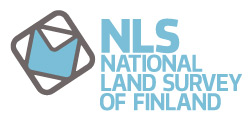

                    Author: Tuukka Mattila
                    Do not hesitate to contact via LinkedIn:
                    https://www.linkedin.com/in/tuukkamattila/
                    
                    Thank you for the help: Topi Rikkinen, Marko Ollikainen, Antti Laaksonen,
                    Hannu Koivula, Octavian Andrei, Mikael Kauhava, Timo Sallinen and Ari Huvinen